In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
b = pd.read_csv('bookings.csv.bz2',sep='^', nrows=100000, na_values='NULL')

## Explore the data 

In [6]:
b.describe()

,duration,distance,intl,pax,year,month
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000
mean,22960.511580,476.904440,0.662550,0.509630,2013.0,2.191040
std,46979.388683,1780.890791,0.472842,2.219013,0.0,1.260222
min,51.000000,0.000000,0.000000,-80.000000,2013.0,1.000000
25%,3370.750000,0.000000,0.000000,-1.000000,2013.0,1.000000
50%,8594.000000,0.000000,1.000000,1.000000,2013.0,3.000000
75%,21535.500000,0.000000,1.000000,1.000000,2013.0,3.000000
max,791131.000000,19012.000000,1.000000,70.000000,2013.0,5.000000


In [8]:
b.shape

(100000, 38)

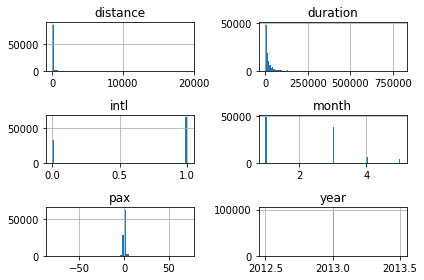

In [9]:
b.hist(bins=100)
plt.tight_layout()

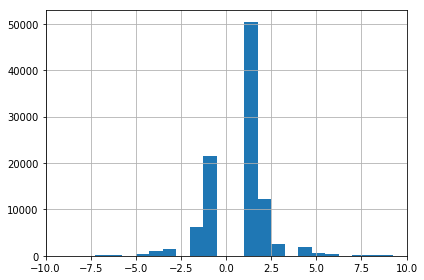

In [10]:
ax = b['pax'].hist(bins=200)
ax.set_xlim((-10, 10))
plt.tight_layout()

In [11]:
b.isnull().sum(axis=0)

act_date               0
source                 0
pos_ctry               0
pos_iata               0
pos_oid                0
rloc                   0
cre_date               0
duration               0
distance               0
dep_port               0
dep_city               0
dep_ctry               0
arr_port               0
arr_city               0
arr_ctry               0
lst_port               0
lst_city               0
lst_ctry               0
brd_port               0
brd_city               0
brd_ctry               0
off_port               0
off_city               0
off_ctry               0
mkt_port               0
mkt_city               0
mkt_ctry               0
intl                   0
route                  0
carrier                0
bkg_class              0
cab_class              0
brd_time               0
off_time               0
pax                    0
year                   0
month                  0
oid                    0
dtype: int64

In [15]:
b.head()

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,...,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546


## Select the columns of interest for the challenge

In [50]:
b = pd.read_csv('bookings.sample.csv', usecols=['arr_port','pax', 'year'], nrows=10000)

In [51]:
b.head()

,arr_port,pax,year
0,LHR,-1,2013
1,CLT,1,2013
2,CLT,1,2013
3,SVO,1,2013
4,SVO,1,2013


In [52]:
b.shape

(10000, 3)

In [53]:
b.dropna().shape

(10000, 3)


## make action plan¶


1)Filter by 2013 2)Groupby arrival port 3) sum pax 4)sort and get top 10

In [54]:
b=b[b['year']==2013]

In [55]:
b=b.drop('year',axis=1)

In [56]:
b.head()

,arr_port,pax
0,LHR,-1
1,CLT,1
2,CLT,1
3,SVO,1
4,SVO,1


2)Group by arr_port

In [57]:
arrports=b.groupby('arr_port')

In [63]:
arrports.sum().sort_values('pax', ascending=False).head()

,pax
arr_port,
HKG,112
LGA,95
ORD,94
JFK,92
LAX,91



## Adjust the code to work with Big data¶


In [65]:
bc = pd.read_csv('bookings.sample.csv', usecols=['arr_port','pax', 'year'],
                 chunksize=4000)
sum_chunks=pd.DataFrame()

for i, b in enumerate(bc):
    print("Chunk: {}, size of chunk {}".format(i+1, len(b)))
    b = b.dropna()
    b = b[b['year']==2013]
    b.drop('year',axis=1, inplace=True)
    arr_ports = b.groupby('arr_port')
    chunk_result = arr_ports.sum()
    sum_chunks = sum_chunks.append(chunk_result)
    
    #.sort_values('pax',ascending=False)
    #.head(10)
sum_chunks.head(), sum_chunks.shape

Chunk: 1, size of chunk 4000
Chunk: 2, size of chunk 4000
Chunk: 3, size of chunk 2000


(          pax
 arr_port     
 ABQ         4
 ABV         0
 ABZ        -2
 ACC         0
 ADD         4, (1182, 1))

In [66]:
%%time
bc = pd.read_csv('bookings.csv.bz2',sep='^', usecols=['arr_port','pax', 'year']\
                , chunksize=1000000)
sum_chunks=pd.DataFrame()

for i, b in enumerate(bc):
    print("Chunk: {}, size of chunk {}".format(i+1, len(b)))
    b=b.dropna()
    b=b[b['year']==2013]
    b.drop('year',axis=1, inplace=True)
    arr_ports=b.groupby('arr_port')
    chunk_result= arr_ports.sum()
    sum_chunks=sum_chunks.append(chunk_result)

Top_airports=sum_chunks.groupby(sum_chunks.index)\
    .pax.sum().sort_values(ascending=False).reset_index()    



Chunk: 1, size of chunk 1000000
Chunk: 2, size of chunk 1000000
Chunk: 3, size of chunk 1000000
Chunk: 4, size of chunk 1000000
Chunk: 5, size of chunk 1000000
Chunk: 6, size of chunk 1000000
Chunk: 7, size of chunk 1000000
Chunk: 8, size of chunk 1000000
Chunk: 9, size of chunk 1000000
Chunk: 10, size of chunk 1000000
Chunk: 11, size of chunk 10
CPU times: user 2min 26s, sys: 2.09 s, total: 2min 28s
Wall time: 2min 31s


In [67]:
Top_airports.head()

,arr_port,pax
0,LHR,88809.0
1,MCO,70930.0
2,LAX,70530.0
3,LAS,69630.0
4,JFK,66270.0
